In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [11]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation='relu', name='first_layer'),
    Dense(16, activation='relu', name='second_layer'),
    Dense(10, activation='softmax', name='third_layer')
])


In [12]:
# Print the model weights
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
first_layer (Dense)          (None, 16)                12560     
_________________________________________________________________
second_layer (Dense)         (None, 16)                272       
_________________________________________________________________
third_layer (Dense)          (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [20]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16, kernel_size=3,strides=2, padding='SAME', activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=3),
    Flatten(),
    Dense(10, activation='softmax')
])

from tensorflow.keras.backend import random_normal
def my_initializer(shape, dtype=None):
    return random_normal(shape, dtype=dtype)
# writting initializer that can be used in Dense kernel_initializer parameter

In [19]:
# Print the model summary
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 2,730
Trainable params: 2,730
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [23]:
# Define the model optimizer, loss function and metrics
from tensorflow.keras.optimizers import SGD
model.compile(
    optimizer=SGD(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'mae']
)


binary_crossentropy


In [27]:
# Print the resulting model attributes
print(model.loss)
print(model.metrics)
print(model.optimizer)

binary_crossentropy
[<tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x71ae2d593a20>, <tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x71ae2d5b9588>]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [31]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [32]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [43]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [44]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
print(train_labels[0])

9


In [47]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images /255
test_images = test_images / 255

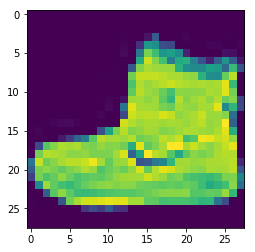

<function print>

In [49]:
# Display one of the images
i = 0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print

#### Fit the model

In [73]:
# Fit the model
model = Sequential([
    Conv2D(16, kernel_size=3, padding='SAME', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=3),
    Flatten(),
    Dense(10, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', 'mae']
)

history = model.fit(train_images[..., np.newaxis], train_labels, epochs=8, batch_size=256)


Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 58s 960us/sample - loss: 2.1636 - accuracy: 0.4330 - mae: 4.4200
Epoch 2/8
60000/60000 [==============================] - 54s 908us/sample - loss: 1.4538 - accuracy: 0.6679 - mae: 4.4200
Epoch 3/8
60000/60000 [==============================] - 54s 903us/sample - loss: 1.0112 - accuracy: 0.7023 - mae: 4.4200
Epoch 4/8
60000/60000 [==============================] - 55s 912us/sample - loss: 0.8418 - accuracy: 0.7263 - mae: 4.4200
Epoch 5/8
60000/60000 [==============================] - 54s 902us/sample - loss: 0.7584 - accuracy: 0.7431 - mae: 4.4200
Epoch 6/8
60000/60000 [==============================] - 55s 912us/sample - loss: 0.7058 - accuracy: 0.7566 - mae: 4.4200
Epoch 7/8
60000/60000 [==============================] - 57s 947us/sample - loss: 0.6688 - accuracy: 0.7660 - mae: 4.4200
Epoch 8/8
60000/60000 [==============================] - 59s 977us/sample - loss: 0.6398 - accuracy: 0.7753 - mae: 4.4200


#### Plot training history

In [76]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head()


,loss,accuracy,mae
0,2.163647,0.433033,4.420002
1,1.453840,0.667933,4.420001
2,1.011183,0.702267,4.419999
3,0.841821,0.726267,4.419999
4,0.758446,0.743067,4.419999


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

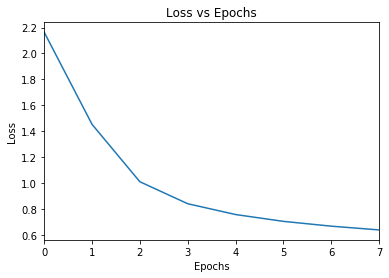

In [77]:
# Make a plot for the loss

loss_plot = df.plot(y="loss", title="Loss vs Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

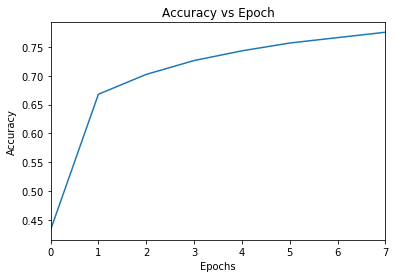

In [78]:
# Make a plot for the accuracy
accuracy_plot = df.plot(y='accuracy', title="Accuracy vs Epoch", legend=False)
accuracy_plot.set(xlabel="Epochs", ylabel="Accuracy")


[Text(0, 0.5, 'MAE'), Text(0.5, 0, 'Epochs')]

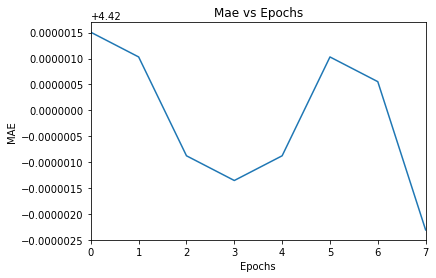

In [79]:
# Make a plot for the additional metric
mae_plot = df.plot(y='mae', title='Mae vs Epochs', legend=False)
mae_plot.set(xlabel='Epochs', ylabel='MAE')


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [80]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [81]:
# Evaluate the model
test_loss, test_accuracy, test_mae= model.evaluate(test_images[..., np.newaxis], test_labels)


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

#### Make predictions from the model

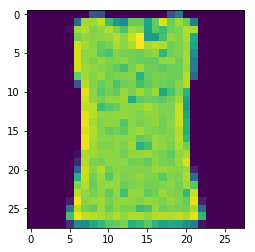

Label: Shirt


In [82]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

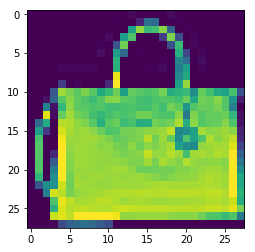

Actual Label:  Bag
Predicted Label:  Bag


In [93]:
# Get the model predictions
img_pred_index=30
img = test_images[30]
plt.imshow(img)
plt.show()
print("Actual Label: ", labels[test_labels[img_pred_index]])
pred = model.predict(img[np.newaxis, ..., np.newaxis])
print("Predicted Label: ", labels[np.argmax(pred)])